<a href="https://colab.research.google.com/github/Anidafio/4105_hw2/blob/main/hw2_p3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Anidafio/4105_hw2/main/Housing.csv'

housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
#housing.head()

In [33]:
#scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
normal_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

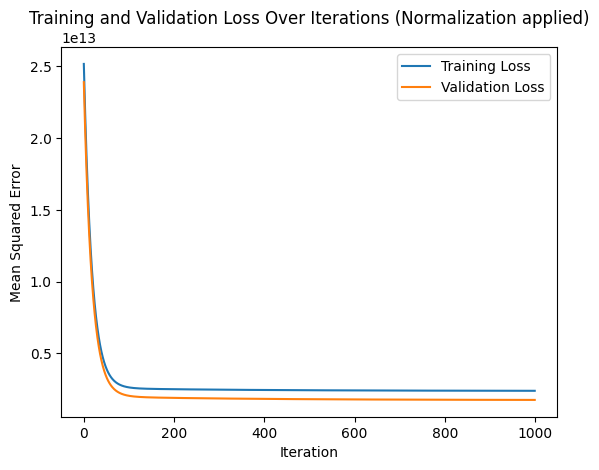

In [34]:
#3a normalization

#split train and test data
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

#2a variables
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#normalization training and test values
df_train[num_vars] = normal_scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = normal_scaler.fit_transform(df_test[num_vars])

X_train = df_train[variables].copy().values
y_train = df_train[['price']].copy().values

X_val = df_test[variables].copy().values
y_val = df_test[['price']].copy().values

m = len(y_train)

#model training
X_b_train = np.insert(X_train, 0, 1, axis=1)
X_b_val = np.insert(X_val, 0, 1, axis=1)

theta = np.zeros((X_b_train.shape[1], 1))
iterations = 1000
alpha = 0.01
lambd = 20

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2/m * lambd * theta
    gradients[0] -= 2/m * lambd * theta[0] # Exclude regularization for theta[0]
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (1/m) * lambd * np.sum(np.square(theta[1:]))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#output plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Normalization applied)")
plt.show()

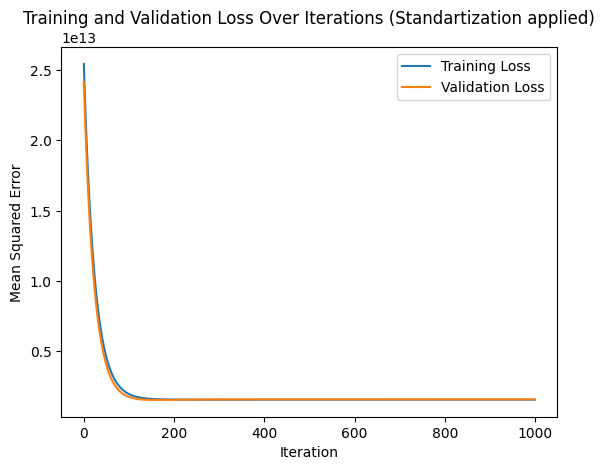

In [35]:
#3a standartization

#split train and test data
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

#3a variables
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#standartization training and test values
df_train[num_vars] = standard_scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = standard_scaler.fit_transform(df_test[num_vars])

X_train = df_train[variables].copy().values
y_train = df_train[['price']].copy().values

X_val = df_test[variables].copy().values
y_val = df_test[['price']].copy().values

m = len(y_train)

#model training
X_b_train = np.insert(X_train, 0, 1, axis=1)
X_b_val = np.insert(X_val, 0, 1, axis=1)

theta = np.zeros((X_b_train.shape[1], 1))
iterations = 1000
alpha = 0.01
lambd = 20

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2/m * lambd * theta
    gradients[0] -= 2/m * lambd * theta[0] # Exclude regularization for theta[0]
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + (1/m) * lambd * np.sum(np.square(theta[1:]))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#output plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Standartization applied)")
plt.show()